+ # Chapter 2: Risk-Neutral Probabilities and Stochastic Discount Factors

Most people are risk-averse and won't pay expected or average value for risky propositions. This was most apparent with the St. Petersburg lottery (section 1.4.1) whose expected value was infinite in its pure form, or perhaps around \$48 when taking into account the limited wealth of the world. Bidding for this lottery usually centers around \$4.

This risk aversion carries over into securities markets. An analog of the Generous Billionaires (section 1.4.2) is a company with a similar payoff pattern. Let's suppose that MiDCo is a pharmaceutical startup company developing a potential blockbuster drug that cures an inability to perform multiple integration. MiDCo will be worth \$1 billion one year from now if its testing phase is successful, and nothing if not. Suppose further that analysts agree that there is a probability $p$ that testing will succeed and a probability $1-p$ that it won't.

MiDCo issues 1 billion shares, i.e. each share represents ownership of one one-billionth of the company. For people with risk-neutral utility functions, a share is worth $p$ now (ignoring the time value of money). But we know that investors don’t have risk-neutral utility functions; they are generally risk-averse.

For example someone whose current wealth is $w$ and who has a logarithmic utility function might be considering an investment of a fraction $f$ of his total wealth in MiDCo. The security will be worth \$1 per share if it's successful. If it's currently valued at $q$ per share, then its payoff factor on success is $1/q$ per share. The point of indifference between investing in this security and doing nothing is
$$p\cdot ln(w(1-f+f/q))+(1-p)\cdot ln(w(1-f))=ln(w)\tag{2.1}$$
That gives
$$q=\frac{f}{(1-f)^{1-1/p}-(1-f)}\tag{2.2}$$
When $f=0$, the investor is willing to pay $q=p$ per share, i.e. the price based on the security's expected value. As $f\rightarrow 1$, the risk of the investment becomes more and more of a concern so the price $q$ the investor is willing to pay approaches zero; that is, the payoff factor $1/q$ required to convince the investor to take the risk approaches infinity. 

The code in the next cell generates isoprobability lines where each line shows the price per share $q$ for a fixed $p$ at differing fractions of wealth $f$.

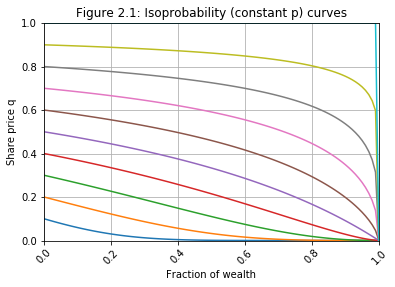

In [2]:
def SharePrice(f,p):
    #Price to pay when a fraction f of
    #wealth is invested in a gamble that pays 1 with probability
    #p and 0 otherwise, log-utility
    #See formula 2.2 above
    if (f<0) or (f>=1) or (p<0) or (p>1): #Can't bet anything
        return(0.0)
    if (f==0.0):              #Limiting amount
        return(p)
    if (p==1.0):
        return(1.0)
    one_minus_f=1-f
    denom=one_minus_f**(1-1/p)-one_minus_f
    return(f/denom)
#Done with SharePrice

#Generate isoprobability graphs
import matplotlib.pyplot as plt
import numpy as np

frac_wealth = np.arange(0,1.01,.01) #compute at fractions of wealth ranging from 0 to 1 by .01's
prob = np.arange(.1,1.1,.1) #Compute isoprobability curves every 10% of probability
y=[]    #y will be array of arrays - each contained array an isoprobability curve
for i in range(10):
    iso_curve=[]
    for j in range(len(frac_wealth)):
        iso_curve.append(SharePrice(frac_wealth[j],prob[i]))
    y.append(iso_curve)   #tack on the isoprobability curve for this probability level

#Display the graph
fig, ax = plt.subplots()
for i in range(len(prob)):
    ax.plot(frac_wealth,y[i])
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
ax.grid()

plt.title('Figure 2.1: Isoprobability (constant p) curves')
plt.xlabel('Fraction of wealth')
plt.ylabel('Share price q')
plt.axis([0,1,0,1])
plt.show();


+ # 2.2 State Prices and No Arbitrage

The maximum share price on each isoprobability curve in Figure 2.1 is $p$, the probability of success. But the price $q$ that investors are willing to pay drops as the fraction of wealth at risk gets higher and higher, because investors demand a premium to take the risk. Eventually with log-utility they just won't pay anything.

Different potential investors will have different levels of starting wealth, so their places on the X-axis of Figure 2.1 will vary. In practice no one has definitive knowledge of the probability of success $p$, so different investors will have different ideas about where to be on the Y-axis of Figure 2.1. In fact some or all potential investors may not even have log-utility functions. In fact they may not even act as if they have utility functions (see 1.7.4). 

All these complications are rather daunting. Nonetheless, securities do manage to trade. Market participants come to a price they would be willing to pay (if they are potential buyers) or receive (if they are potential sellers) based on their combined thoughts about probability of success and risk preference. If the highest-price buyer has a price that is above or equal to the lowest-price seller, then a transaction will take place at a _market-clearing price $q$_ that matches up overlapping buyers and sellers. These buyers and sellers are cleared from the market since their wishes are fulfilled.

Let's use "W" (for "win") to denote a share of MiDCo; W's price is $q$. And suppose that there exists a complementary security "L" (for "lose") that pays \$1 if the multiple integration drug fails, and \$0 if it succeeds. If I buy one W and one L, the combined position of the two securities will be worth \$1 one year from now no matter what happens.

While W alone or L alone are risky securities - we don't know at the present time whether they will pay off or not - the combination W+L is risk-free. We know exactly what will happen to W+L in the future: no matter which outcome is realized, W+L will be worth \$1. Therefore (ignoring for now the time value of money) W+L must be worth \$1 today. If it's worth less than that - say \$0.90 - we would borrow \$0.90 to buy W+L, and in the future we'll always have \$1 and owe \$0.90, for a net profit of \$0.10. That's free money - we got something for nothing.

A fundamental principle in markets is that there shouldn't be opportunities to make free money. If an investor can take on a position that costs nothing, and its value in at least one future state of the world is positive while its value in no future state of the world is negative (i.e. the investor never owes money), then that's free money. Or equivalently, if taking on a position has a strictly negative cost (i.e. taking on the position gives money to the investor in the present time) while in all future states of the world the position's value is non-negative, then that's free money. Such positions are free from risk because we know with certainty that they will be profitable.

Such a free money position is called a _(risk-free) arbitrage_, and the assumed lack of such opportunities is called _no-arbitrage_.

In practice arbitrages can and do exist. They can appear momentarily, for example due to mistakes by market participants. But vigilant investors will quickly see such mistakes and take advantage of them. The very act of taking advantage of arbitrages will eventually make them disappear, since the arbitrageur will exert pressure on prices in the right direction by buying too-cheap securities and selling too-expensive securities.

It is also possible for small arbitrages to exist because there may be costs involved in taking advantage of the arbitrage. For example, if the price of gold in New York is less than the price of gold in London, an arbitrageur could buy gold in New York and sell it in London. But as a practical matter gold dealers would charge a commission for the buy in New York and the sell in London, and it would cost something to transport the gold from New York to London. Further, the transportation would take a little time during which the price could change. There might be taxes in one or both locations. There might be regulatory restrictions on importing or exporting gold. So the New York gold price might be a little different than the London gold price and it wouldn't be worth the cost of closing the gap. But if there's a big enough price difference, someone will arbitrage it away.

A general mathematical formulation of the no-arbitrage principle is the following: For any linear combination $a_1x_1+…+a_nx_n$ of securities $x_1,...,x_n$ where the current price of the combination is zero, then either (a) the price of the combination must be zero in all future states of the world; or (b) there must be at least one future state with a strictly positive price and at least one future state with a strictly negative price.

We noted above that we were ignoring the time value of money, but let's  take that into account now. We'll learn more about time value in Chapter 3, but for now note that money in the future is not the same as money now. Often we will assume there is a _risk-free rate $r_f$_ that translates money in the future into money now. $r_f$ might be the rate of interest paid by a completely reliable bank or government. So if such an institution is paying $r_f=3\%$ a year, then a dollar today is worth \$1.03 one year from now no matter what happens; conversely a dollar in the future (one year from now) is worth $\frac{\$1}{1.03}$ now.

Returning to W and L - the securities that pay on a win for MiDCo and a loss for MiDCo, respectively - we will introduce another security to take into account the time value of money. Let R be one unit of the risk-free security that is worth \$1 one year in the future, and therefore worth $\$\frac{1}{1+r_f}$ today. Suppose the price of W+L today is less than the price of R. Then we would buy W+L and sell a fraction $0<f<1$ of R so that the current price of $W+L-fR$ is zero. The value of the linear combination $W+L-fR$ will be positive in all future states, violating the no-arbitrage principle. Similarly W+L's current price cannot be more than the price of R, since $-W-L+fR$ would be an arbitrage.

Thus the no-arbitrage principle together with the time value of money indicates that the current price of W+L must be $\$\frac{1}{1+r_f}$. If  all investors were risk-neutral - if the prices of W and L just represented their assessments of the probabilities of success or failure without a risk adjustment - then the consensus probability $q$ of success would be the current price of $W$ times $1+r_f$. The complementary consensus probability $1-q$ of failure would be the current price of $L$ times $1+r_f$.

We have couched the outcomes of MiDCo in starkly binary terms - either it succeeds fully and W (L) is worth \$1 (\$0) a share or it fails fully and W (L) is worth \$0 (\$1) a share. That means these securities are examples of _state-price securities_ or _Arrow-Debreu contingent claims_. Such securities are indicator variables - they pay \$1 contingent on the occurrence of some future state of the world (e.g. drug success) and nothing if that state doesn't occur.

So $q,1-q$ form a _risk-neutral probability measure_ for the two-outcome space \{MiDCo success,MiDCo failure\}. The term "risk-neutral" in this context means "derived from observed state prices under the (counterfactual) assumption that market participants are risk-neutral."

More generally, we could suppose a standard Knightian or Von Neumann-Morgenstern framework with a finite set of nonoverlapping outcomes $\Omega=\{s_1,...,s_n\}$ that encompass all possible future states. In that framework we assume there is a market in which we can observe the prices of a complete set of $n$ Arrow-Debreu contingent claims where the $i^{th}$ claim pays \$1 if $s_i$ occurs one period into the future and \$0 if not. Let $q_i$ be the current price of the $i^{th}$ claim multiplied by $1+r_f$ (to account for the time value of money); then as above the no-arbitrage principle says $q_1+...+q_n=1$ since one and only one of the outcomes must occur. The $q_i$ form the probability mass function for the risk-neutral probability space.

Discrete state prices can be generalized to continuous state price densities when the outcome space is an interval on the real line representing monetary amounts or rates of return. Let $Q_0(x)$ be a cumulative state price function that pays \$1 if the outcome is less than or equal to x, and \$0 otherwise. If $Q_0$ is differentiable, then $q_0(x)=Q_0^{\prime}(x)$ is the state price density function. As in the finite case, an adjustment for the time value of money must be applied to the current functions to make them probability densities and cumulative distribution functions; in continuous situtations it is customary to use the adjustment $exp(r_f)$ rather than $1+r_f$. (See section 3.x for further discussion.) So $Q(x)=exp(r_f)Q_0(x)$ is a cdf and $q(x)=exp(r_f)q_0(x)$ is a pdf with the appropriate properties, assuming no-arbitrage.

Thus when there is no-arbitrage and a complete set of contingent claims on an outcome space $\Omega$, we can can construct a _risk-neutral probability measure_ $Q$ by observing the market prices of the claims and adjusting by the risk-free rate.

+ # 2.3 P and Q probability measures; stochastic discount factors

The risk-neutral probability measure $Q$ that was discussed in section 2.2 does not give us the probabilities of outcomes occurring, unless every market participant miraculously happens to be risk-neutral. The so-called "real-world" or "natural" probabilities of outcomes, or even the market consensus of such real-world probabilities, remain unobservable. However there is a way to translate between risk-neutral and real-world probabilities.

Assume a one-period world with a current time where state prices are observable, and a future time where prices are functions of states but are not currently observable. Let $X$ be a random variable giving prices of a particular security; that is, $X$ maps future states $\omega$ into an interval of the real line representing prices. When the outcome space $\Omega$ is finite, we can write
$$Price(0,X)=\sum{X(\omega)q(\omega)}=\bigl(\sum q(\omega)\bigr)\bigl(\sum{X(\omega)\frac{q(\omega)}{\sum{q(\omega)}}}\bigr) =exp(-r_f)\mathbb{E}_{Q}[X]\tag{2.3}$$
where $q(\omega)$ is the time-0 state price of outcome $\omega$. The assumption that the sum of all state prices equals the time-0 value $exp(-r_f)$ of a risk-free instrument is a result of the absence of arbitrage as we saw in section 2.2.

Similarly the continuous version is
$$Price(0,X)=\int{X(\omega)dQ(\omega)}=\bigl(\int dQ(\omega)\bigr)\bigl(\int{X(\omega)\frac{dQ(\omega)}{\int{dQ(\omega)}}}\bigr)$$
$$=exp(-r_f)\mathbb{E}_{Q}[X]\tag{2.4}$$
for the current (time-0) price of $X$.

If $P$ is the real-world or natural probability measure where (in the finite version) $p(\omega)$ is the probability that outcome $\omega$ will occur, then we can define the expected value of a random variable $X$ under the $P$ probability measure as
$$\mathbb{E}_{P}[X]=\sum{p(\omega) X(\omega)}\tag{2.5}$$
Define a random variable $\varphi(\omega)=q(\omega)/p(\omega)$ (where $q(\omega)$ is the time-0 state price of $\omega$). Then with no-arbitrage we can say
$$\mathbb{E}_{P}[\varphi X]=exp(-r_f)\mathbb{E}_Q[X]\implies Price(0,X)=\mathbb{E}_{P}[\varphi X]\tag{2.6}$$

The random variable $\varphi$ is called a _pricing kernel_ or _stochastic discount factor ("SDF")_. In the continuous case we define $\varphi(x)=q(x)/p(x)$ where q(x) is the state price density and p(x) is the real-world probability density. The SDF allows us to take an expectation in the future and translate it into a current price. It does this by taking into account the time value of money and risk preferences.

Technically the stochastic discount factor is the Radon-Nikodym derivative of the cdf Q with respect to the natural probability distribution P (adjusted for time discounting).

What good is (2.6)? We've just taken the problem of an unobservable $P$ and pushed it into an unobservable $\varphi$. But this way of reframing the problem turns out to be valuable.

Some properties of an SDF $\varphi$ (assuming no-arbitrage):
$$\mathbb{E}_P[\varphi]=exp(-r_f)\tag{2.7}$$
Let $Y=X/Price(0,X)$ be the return relative (one plus rate of return) of the random variable $X$. Then from (2.6) we have
$$\mathbb{E}_P[\varphi Y]=1\tag{2.8}$$
By definition the covariance of $\varphi$ and $Y$ is
$$cov(M,Y)=\mathbb{E}_P[(\varphi-\mathbb{E}_P[\varphi]))(Y-\mathbb{E}_P[Y])]$$
(As with many of our expressions, the probability distribution over which the covariance is computed - $P$ in this case - is left implicit unless there can be confusion.) Using (2.7) and (2.8) we have
$$\mathbb{E}_P[Y]-exp(r_f)=-exp(r_f)cov(\varphi,Y)\tag{2.9}$$
The expression on the left-hand side is the _risk premium_ of $Y$: that's its excess rate of return over the rate of return of a riskless investment. Risk aversion means that investors will demand that the expression on the left-hand side is positive; if not they'll just invest in the riskless asset. The stochastic discount factor $\varphi$ encodes risk preferences via its covariances with risky investments as shown in (2.9).



In [ ]:
# Get Market Caps of Facebook (FB) and Tesla (TSLA)
# Use Intrinio API
import pandas as pd

api_key='OmYyZjU1MjA0NzgzYTdjNTI5Nzg5ZGIyNjI3MTIxNGZi'
url_TSLA='https://api.intrinio.com/data_point?identifier=TSLA&item=marketcap&api_key='
url_FB='https://api.intrinio.com/data_point?identifier=FB&item=marketcap&api_key='

#Dataframe has just 3 text fields - strip column 3
df_TSLA=pd.read_csv(url_TSLA+api_key)
mcap_TSLA=float(df_TSLA.columns[2][6:-1])
df_FB=pd.read_csv(url_FB+api_key)
mcap_FB=float(df_FB.columns[2][6:-1])

mc_factor=mcap_FB/mcap_TSLA
print('Current Market Cap of Facebook ($ billions): %f'%mcap_FB/10**9)
print('Current Market Cap of Tesla ($ billions): %f'%mcap_TSLA/10**9)
print('Factor (FB/TSLA): %f'% mc_factor)

In [ ]:
type(mcap_TSLA)

In [ ]:
c[:5]

In [ ]:
c=c**p